In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
df_condition = pd.read_csv('/content/drive/My Drive/depression/merged_data_condition.csv')
df_control= pd.read_csv('/content/drive/My Drive/depression/merged_data_control.csv')
df_scores= pd.read_csv('/content/drive/My Drive/depression/scores.csv')

Mounted at /content/drive


In [2]:
df_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551716 entries, 0 to 551715
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  551716 non-null  object
 1   date       551716 non-null  object
 2   activity   551716 non-null  int64 
 3   Source     551716 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.8+ MB


In [3]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019990 entries, 0 to 1019989
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1019990 non-null  object
 1   date       1019990 non-null  object
 2   activity   1019990 non-null  int64 
 3   Source     1019990 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.1+ MB


In [4]:
df_condition['Source'] = df_condition['Source'].str.replace('.csv','')
df_control['Source'] = df_control['Source'].str.replace('.csv','')


In [5]:
df_scores.isna().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [6]:
df_scores.dtypes

number        object
days           int64
gender         int64
age           object
afftype      float64
melanch      float64
inpatient    float64
edu           object
marriage     float64
work         float64
madrs1       float64
madrs2       float64
dtype: object

In [7]:
#NA referes to control group so its not null value it indicate they are healthy
df_scores['afftype'] = df_scores['afftype'].fillna(0)



In [8]:
changed = df_scores[df_scores['number'].str.startswith('control_')]

# Replace 'NA' values in the 'melanch' column for the control group with 2
changed['melanch'] = changed['melanch'].fillna(2)

# Update the original DataFrame with the modified data for the control group
df_scores.update(changed)


<ipython-input-8-d38b30f66718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed['melanch'] = changed['melanch'].fillna(2)


In [9]:
# Fill 'NA' values in the 'melanch' column for the condition group with 2
df_scores.loc[df_scores['melanch'].isna(), 'melanch'] = 2


In [10]:
changed = df_scores[df_scores['number'].str.startswith('control_')]

# Replace 'NA' values in the 'inpatient' column for the control group with 0
changed['inpatient'] = changed['inpatient'].fillna(0)

# Update the original DataFrame with the modified data for the control group
df_scores.update(changed)


<ipython-input-10-496c7e1f267a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed['inpatient'] = changed['inpatient'].fillna(0)


Unique values and their frequencies:
edu
         31
6-10     12
11-15     8
16-20     2
Name: count, dtype: int64


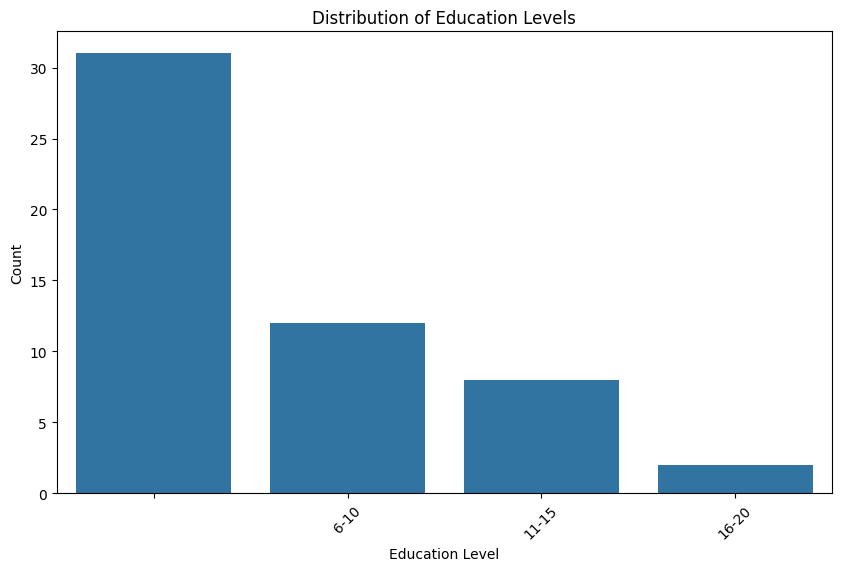

Number of missing values in 'edu' column: 2


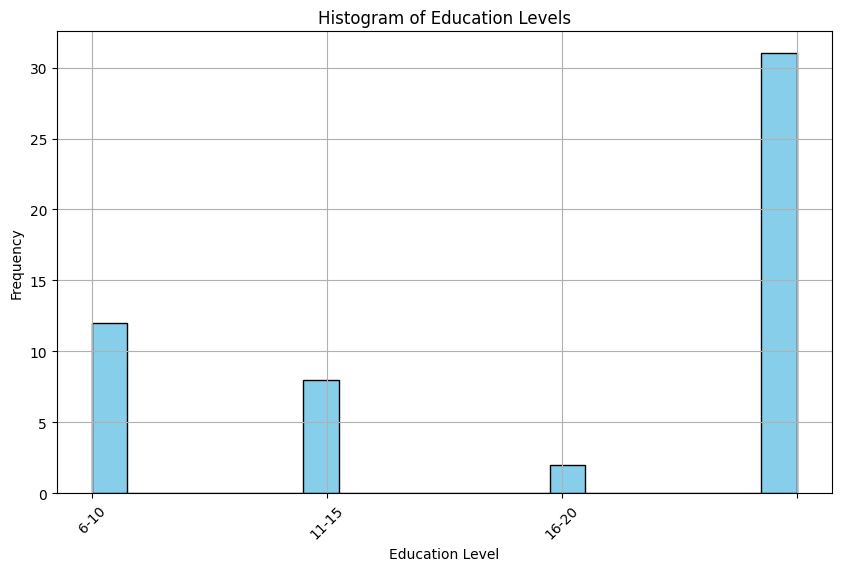

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
edu_counts = df_scores['edu'].value_counts()
print("Unique values and their frequencies:")
print(edu_counts)

# Plot a bar chart to visualize the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='edu', data=df_scores, order=df_scores['edu'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Check for missing values
missing_values = df_scores['edu'].isna().sum()
print("Number of missing values in 'edu' column:", missing_values)

# Plot a histogram of the column to visualize its distribution
plt.figure(figsize=(10, 6))
plt.hist(df_scores['edu'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Drop the 'edu' column
df_scores.drop(columns=['edu'], inplace=True)


In [13]:
df_scores['DeltaMADRS'] = df_scores.madrs2 - df_scores.madrs1

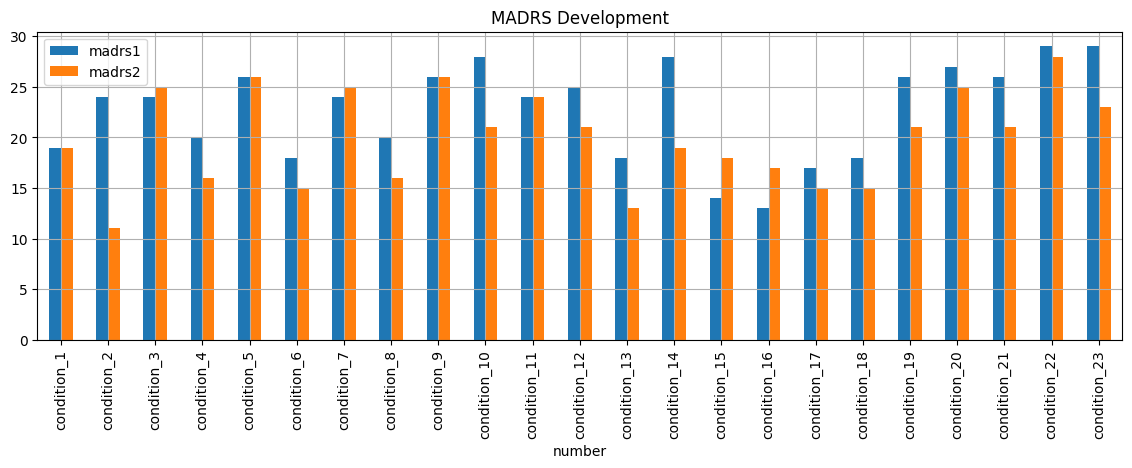

In [14]:
scores_condition = df_scores[df_scores.number.str.contains('condition')].copy()
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
scores_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

In [15]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']

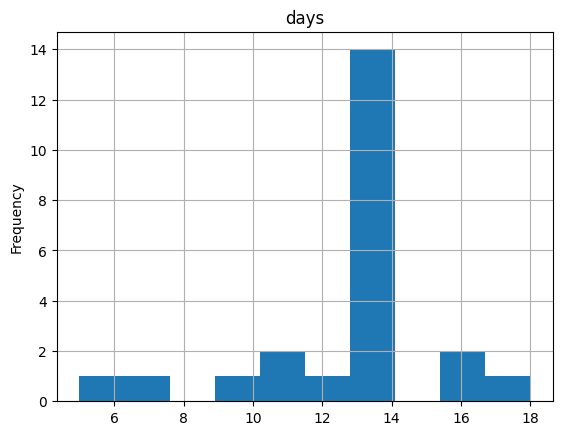

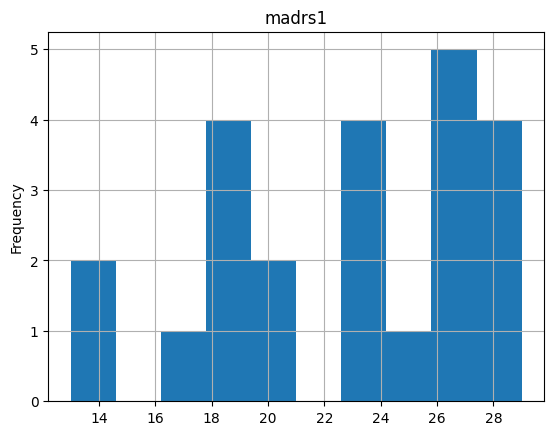

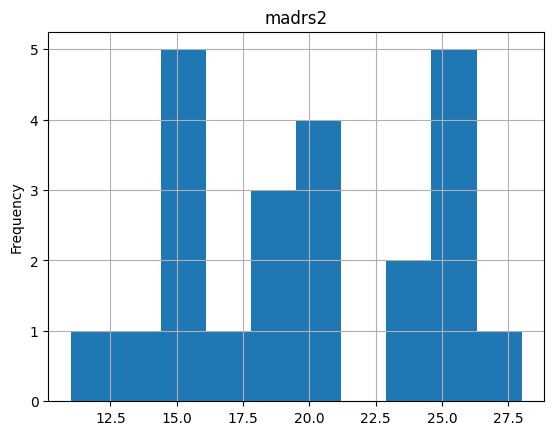

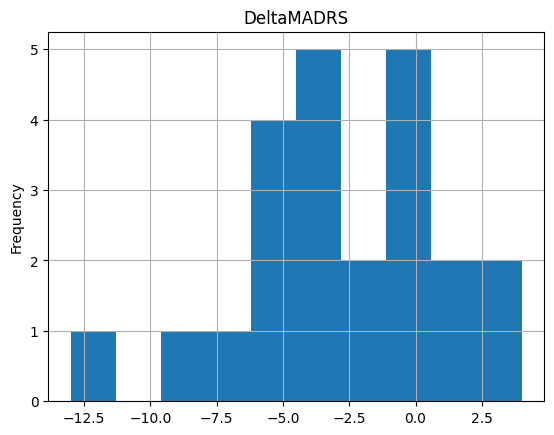

In [16]:
for f in features_num:
    scores_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

In [17]:
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient','marriage', 'work']

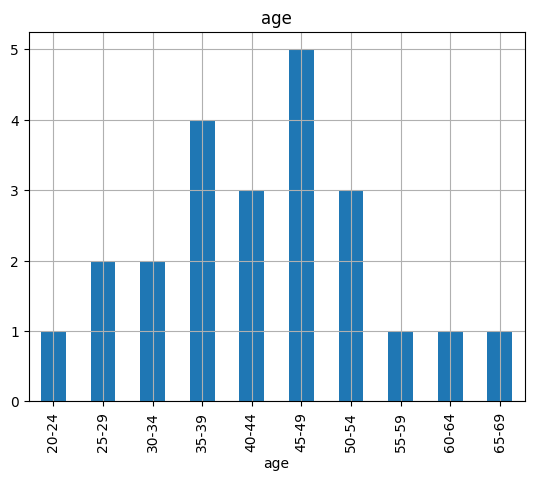

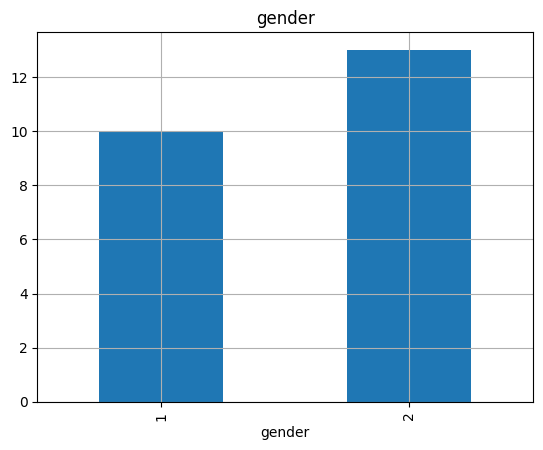

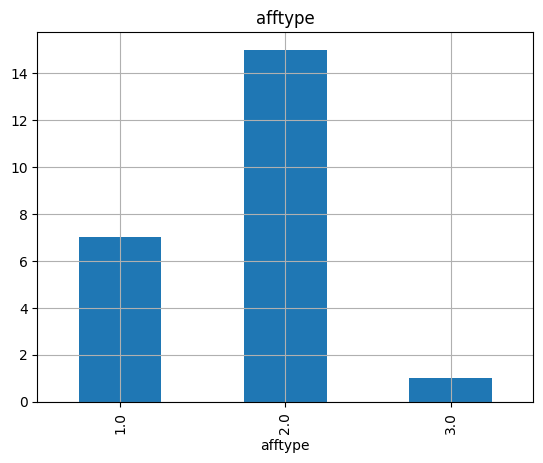

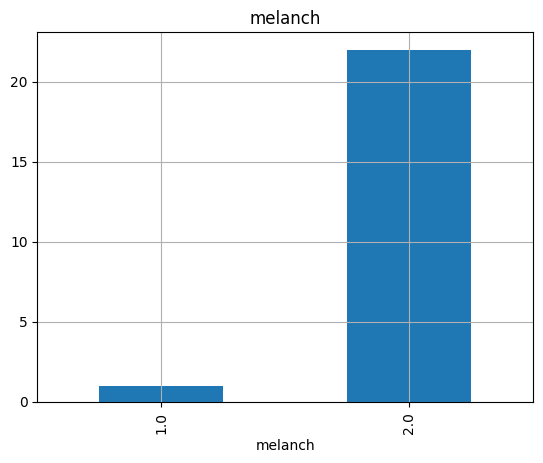

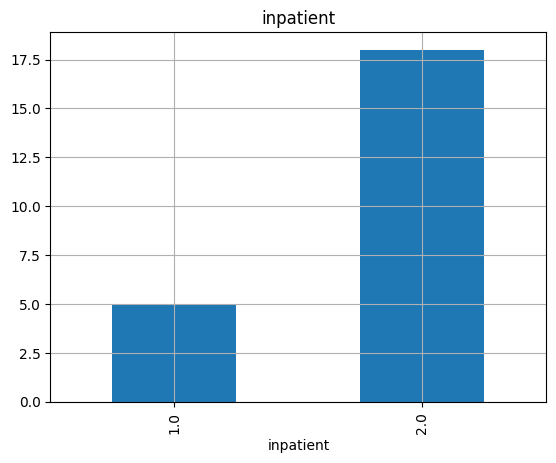

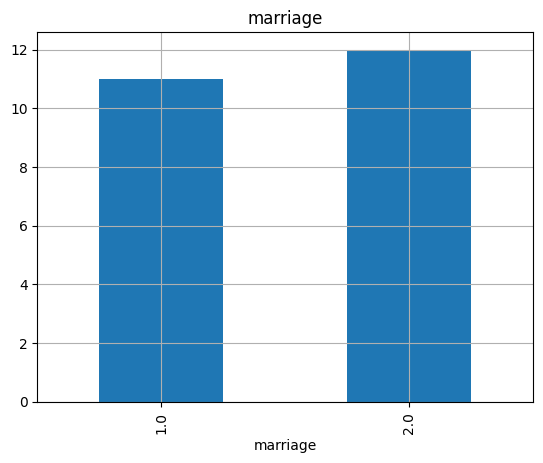

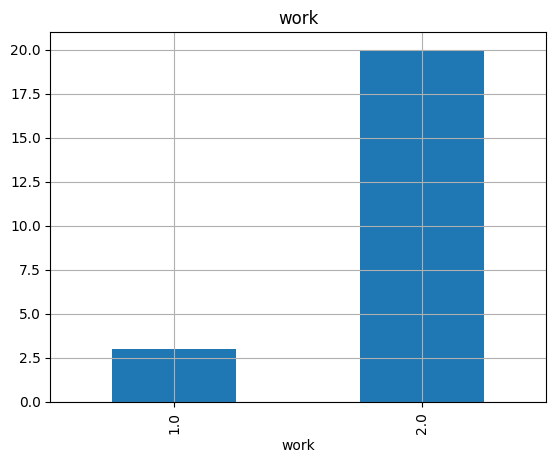

In [18]:
for f in features_cat:
    scores_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

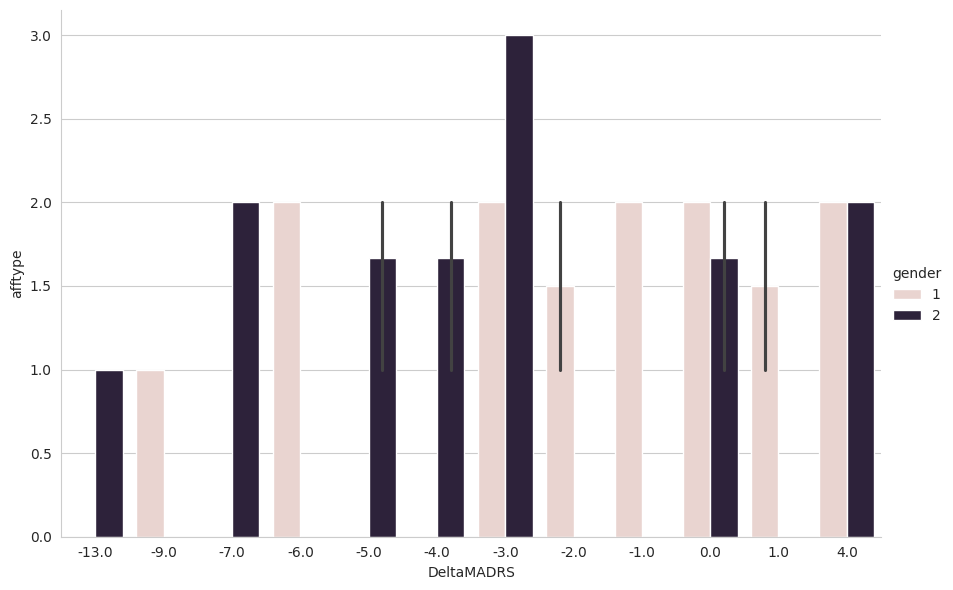

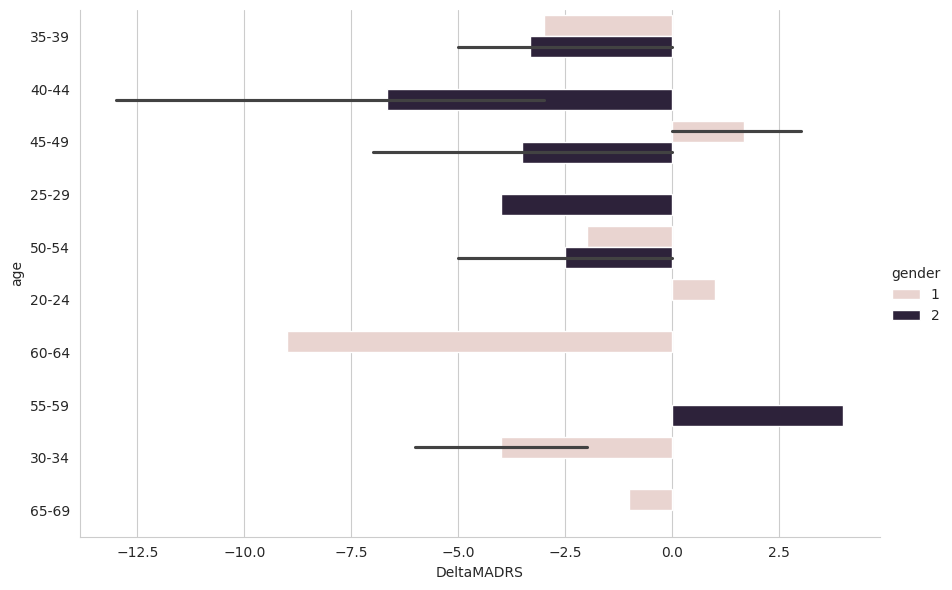

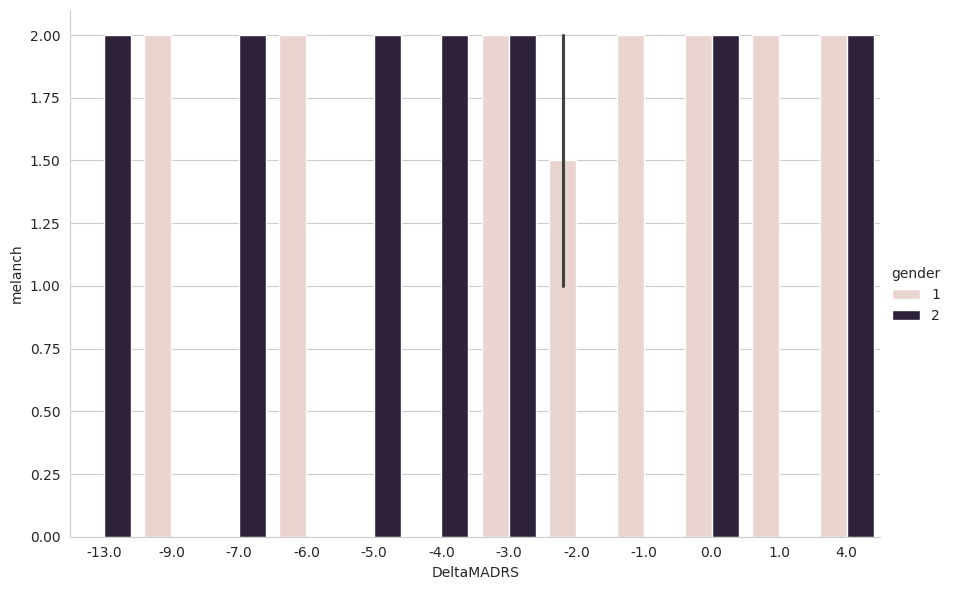

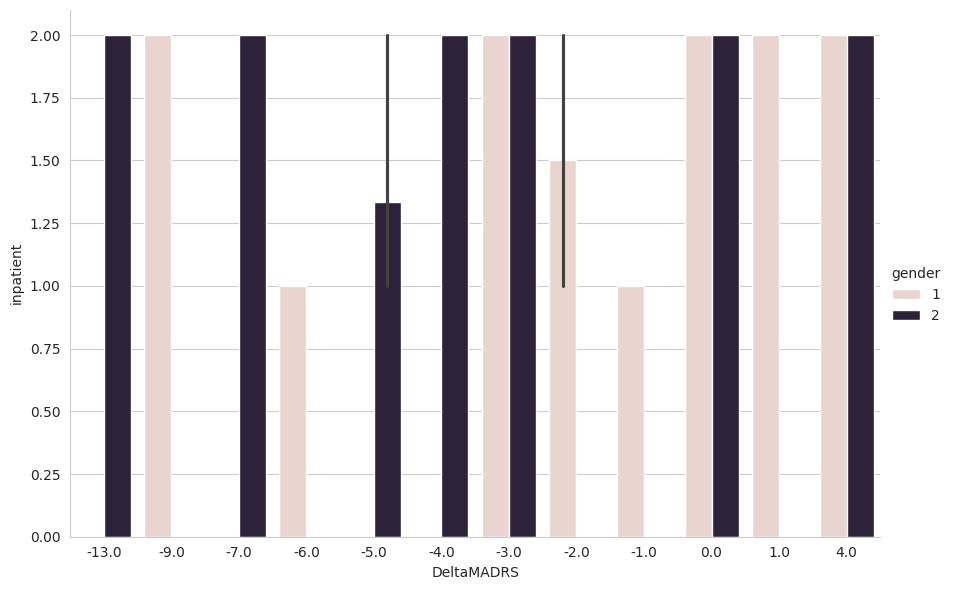

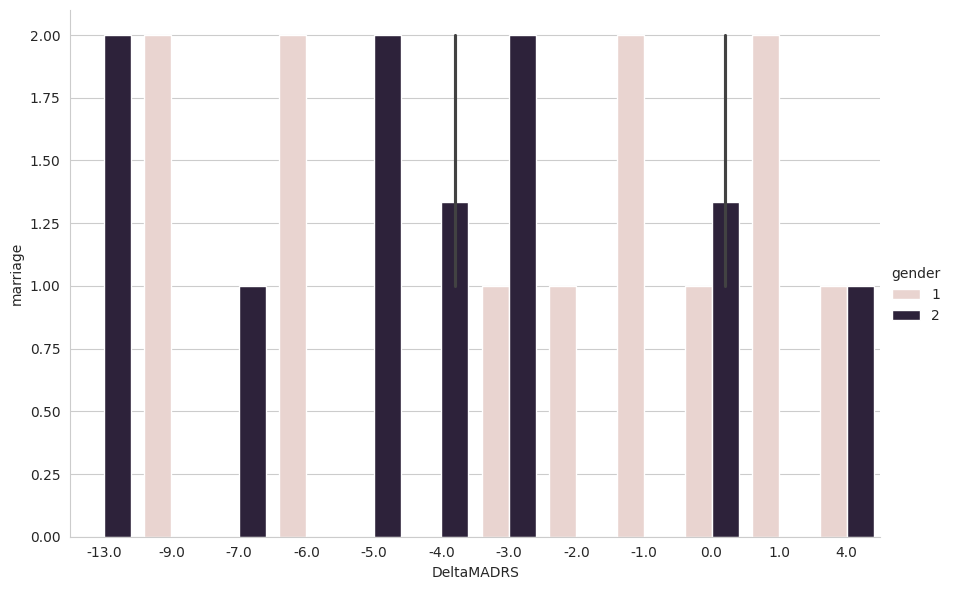

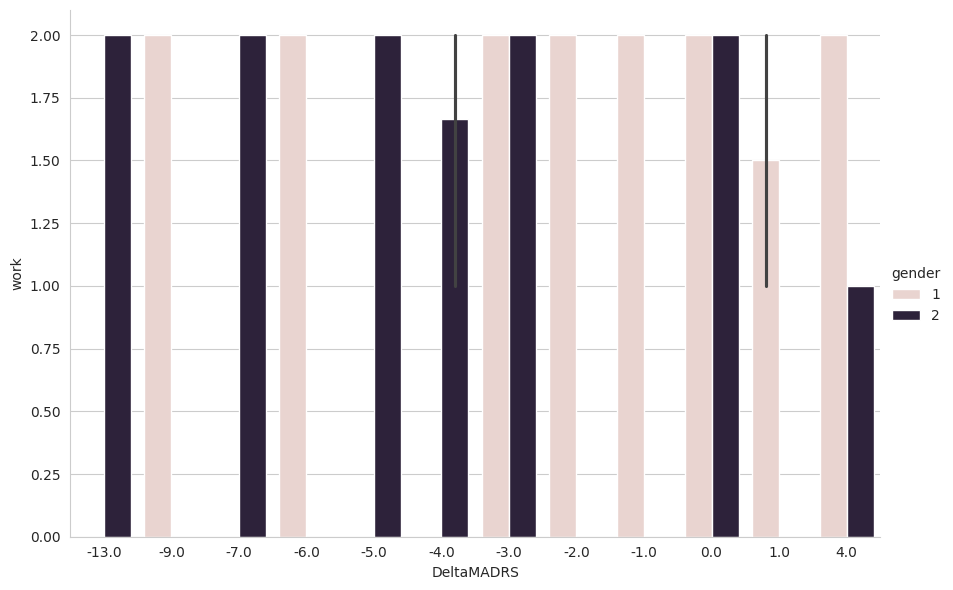

In [19]:
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the MADRS score difference with hue
sns.catplot(x="DeltaMADRS", y="afftype", hue="gender", data=scores_condition, kind="bar", height=6, aspect=1.5)
sns.catplot(x="DeltaMADRS", y="age", hue="gender", data=scores_condition, kind="bar", height=6, aspect=1.5)
sns.catplot(x="DeltaMADRS", y="melanch", hue="gender", data=scores_condition, kind="bar", height=6, aspect=1.5)
sns.catplot(x="DeltaMADRS", y="inpatient", hue="gender", data=scores_condition, kind="bar", height=6, aspect=1.5)
sns.catplot(x="DeltaMADRS", y="marriage", hue="gender", data=scores_condition, kind="bar", height=6, aspect=1.5)
sns.catplot(x="DeltaMADRS", y="work", hue="gender", data=scores_condition, kind="bar", height=6, aspect=1.5)
plt.show()


# **summary statistics and visualize the distribution of activity measurements for both the control and condition groups**

Control Group Activity Summary:
count    1.019990e+06
mean     1.884807e+02
std      3.787996e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      2.130000e+02
max      8.000000e+03
Name: activity, dtype: float64

Condition Group Activity Summary:
count    551716.000000
mean        163.082720
std         320.837343
min           0.000000
25%           0.000000
50%           6.000000
75%         184.000000
max        8000.000000
Name: activity, dtype: float64


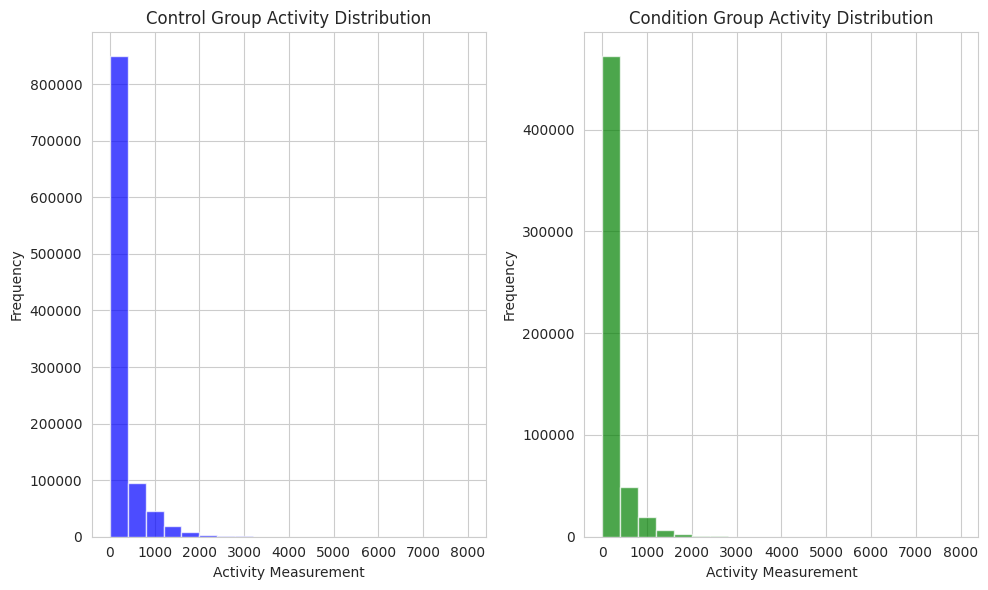

In [20]:
import matplotlib.pyplot as plt

# Calculate summary statistics for the activity variable
control_activity_summary = df_control['activity'].describe()
condition_activity_summary = df_condition['activity'].describe()


print("Control Group Activity Summary:")
print(control_activity_summary)
print("\nCondition Group Activity Summary:")
print(condition_activity_summary)

# Plot histograms or kernel density plots to visualize the distribution of activity measurements
plt.figure(figsize=(10, 6))

# Plot histogram for control group
plt.subplot(1, 2, 1)
plt.hist(df_control['activity'], bins=20, color='blue', alpha=0.7)
plt.title('Control Group Activity Distribution')
plt.xlabel('Activity Measurement')
plt.ylabel('Frequency')

# Plot histogram for condition group
plt.subplot(1, 2, 2)
plt.hist(df_condition['activity'], bins=20, color='green', alpha=0.7)
plt.title('Condition Group Activity Distribution')
plt.xlabel('Activity Measurement')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

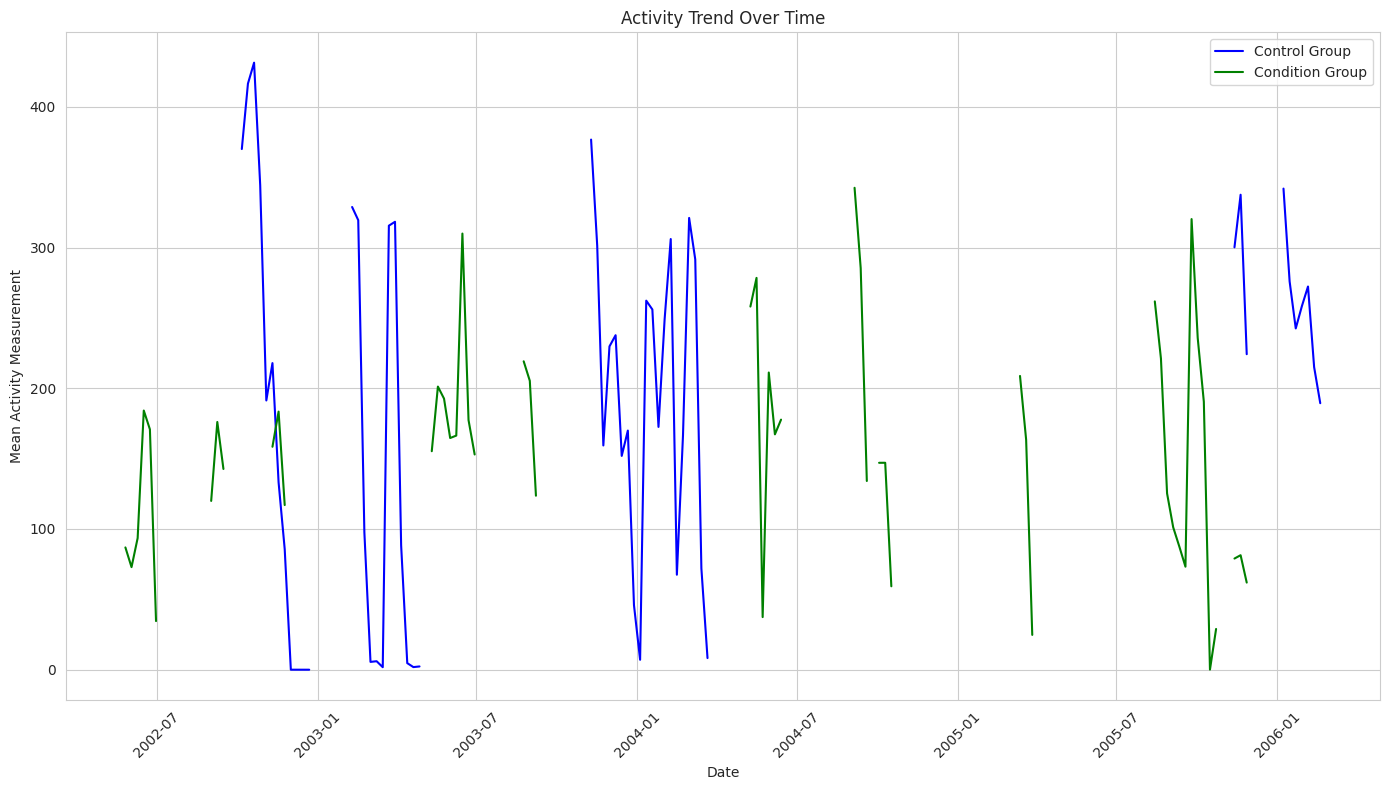

In [21]:
# Convert timestamp to datetime
df_control['timestamp'] = pd.to_datetime(df_control['timestamp'])
df_condition['timestamp'] = pd.to_datetime(df_condition['timestamp'])

# Group by date and calculate summary statistics for activity
control_activity_by_date = df_control.groupby('date')['activity'].describe()
condition_activity_by_date = df_condition.groupby('date')['activity'].describe()

# Plot time trends of activity measurements
plt.figure(figsize=(14, 8))

# Convert date index to datetime
control_activity_by_date.index = pd.to_datetime(control_activity_by_date.index)
condition_activity_by_date.index = pd.to_datetime(condition_activity_by_date.index)

# Aggregate dates into weekly intervals
control_activity_by_week = control_activity_by_date.resample('W').mean()
condition_activity_by_week = condition_activity_by_date.resample('W').mean()

# Plot time trends of activity measurements
plt.plot(control_activity_by_week.index, control_activity_by_week['mean'], label='Control Group', color='blue')
plt.plot(condition_activity_by_week.index, condition_activity_by_week['mean'], label='Condition Group', color='green')

plt.title('Activity Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Activity Measurement')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
print("Columns in df_scores:", df_scores.columns)
print("Columns in df_condition:", df_condition.columns)
print("Columns in df_control:", df_control.columns)


Columns in df_scores: Index(['number', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient',
       'marriage', 'work', 'madrs1', 'madrs2', 'DeltaMADRS'],
      dtype='object')
Columns in df_condition: Index(['timestamp', 'date', 'activity', 'Source'], dtype='object')
Columns in df_control: Index(['timestamp', 'date', 'activity', 'Source'], dtype='object')


In [23]:
df_condition.rename(columns={'Source': 'number'}, inplace=True)
df_control.rename(columns={'Source': 'number'}, inplace=True)

In [24]:
# Merge df_scores with df_condition
merged_condition_scores = pd.merge(df_condition, df_scores, on='number', how='left')

# Merge df_scores with df_control
merged_control_scores = pd.merge(df_control, df_scores, on='number', how='left')


In [25]:
merged_condition_scores

,timestamp,date,activity,number,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,DeltaMADRS
0,2003-05-07 12:00:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0.0
1,2003-05-07 12:01:00,2003-05-07,143,condition_1,11,2,35-39,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0.0
2,2003-05-07 12:02:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0.0
3,2003-05-07 12:03:00,2003-05-07,20,condition_1,11,2,35-39,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0.0
4,2003-05-07 12:04:00,2003-05-07,166,condition_1,11,2,35-39,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0
551712,2004-06-10 15:04:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0
551713,2004-06-10 15:05:00,2004-06-10,449,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0
551714,2004-06-10 15:06:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0


In [26]:
merged_control_scores

,timestamp,date,activity,number,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,DeltaMADRS
0,2003-03-18 15:00:00,2003-03-18,60,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2003-03-18 15:01:00,2003-03-18,0,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2003-03-18 15:02:00,2003-03-18,264,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2003-03-18 15:03:00,2003-03-18,662,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2003-03-18 15:04:00,2003-03-18,293,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019985,2003-12-01 12:53:00,2003-12-01,7,control_9,13,2,30-34,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1019986,2003-12-01 12:54:00,2003-12-01,7,control_9,13,2,30-34,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1019987,2003-12-01 12:55:00,2003-12-01,5,control_9,13,2,30-34,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1019988,2003-12-01 12:56:00,2003-12-01,5,control_9,13,2,30-34,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN


In [27]:
merged_condition_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551716 entries, 0 to 551715
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   timestamp   551716 non-null  datetime64[ns]
 1   date        551716 non-null  object        
 2   activity    551716 non-null  int64         
 3   number      551716 non-null  object        
 4   days        551716 non-null  int64         
 5   gender      551716 non-null  int64         
 6   age         551716 non-null  object        
 7   afftype     551716 non-null  float64       
 8   melanch     551716 non-null  float64       
 9   inpatient   551716 non-null  float64       
 10  marriage    551716 non-null  float64       
 11  work        551716 non-null  float64       
 12  madrs1      551716 non-null  float64       
 13  madrs2      551716 non-null  float64       
 14  DeltaMADRS  551716 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(3), object(

In [28]:
merged_condition_scores.isna().sum()

timestamp     0
date          0
activity      0
number        0
days          0
gender        0
age           0
afftype       0
melanch       0
inpatient     0
marriage      0
work          0
madrs1        0
madrs2        0
DeltaMADRS    0
dtype: int64

In [29]:
merged_control_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019990 entries, 0 to 1019989
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   timestamp   1019990 non-null  datetime64[ns]
 1   date        1019990 non-null  object        
 2   activity    1019990 non-null  int64         
 3   number      1019990 non-null  object        
 4   days        1019990 non-null  int64         
 5   gender      1019990 non-null  int64         
 6   age         1019990 non-null  object        
 7   afftype     1019990 non-null  float64       
 8   melanch     1019990 non-null  float64       
 9   inpatient   1019990 non-null  float64       
 10  marriage    0 non-null        float64       
 11  work        0 non-null        float64       
 12  madrs1      0 non-null        float64       
 13  madrs2      0 non-null        float64       
 14  DeltaMADRS  0 non-null        float64       
dtypes: datetime64[ns](1), float64(8)

In [30]:
merged_control_scores.isna().sum()

timestamp           0
date                0
activity            0
number              0
days                0
gender              0
age                 0
afftype             0
melanch             0
inpatient           0
marriage      1019990
work          1019990
madrs1        1019990
madrs2        1019990
DeltaMADRS    1019990
dtype: int64

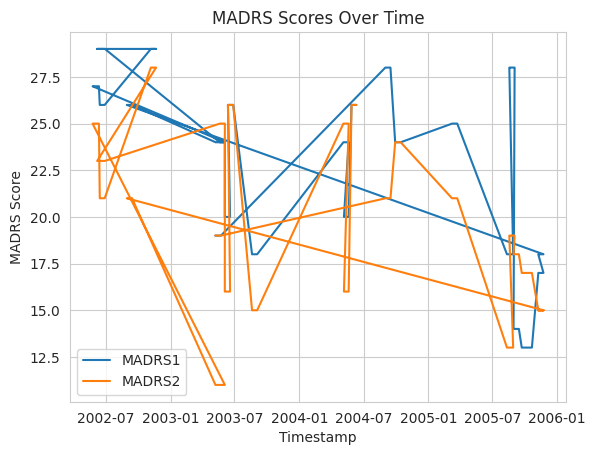

In [31]:
# Convert timestamp to datetime if it's not already in datetime format
merged_condition_scores['timestamp'] = pd.to_datetime(merged_condition_scores['timestamp'])

# Plot MADRS scores over time
plt.plot(merged_condition_scores['timestamp'], merged_condition_scores['madrs1'], label='MADRS1')
plt.plot(merged_condition_scores['timestamp'], merged_condition_scores['madrs2'], label='MADRS2')
plt.xlabel('Timestamp')
plt.ylabel('MADRS Score')
plt.title('MADRS Scores Over Time')
plt.legend()
plt.show()


In [32]:
merged = pd.concat([merged_control_scores, merged_condition_scores], ignore_index=True)
merged

,timestamp,date,activity,number,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,DeltaMADRS
0,2003-03-18 15:00:00,2003-03-18,60,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2003-03-18 15:01:00,2003-03-18,0,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2003-03-18 15:02:00,2003-03-18,264,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2003-03-18 15:03:00,2003-03-18,662,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2003-03-18 15:04:00,2003-03-18,293,control_1,8,2,25-29,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,2004-06-10 15:03:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0
1571702,2004-06-10 15:04:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0
1571703,2004-06-10 15:05:00,2004-06-10,449,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0
1571704,2004-06-10 15:06:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,1.0,2.0,26.0,26.0,0.0


In [33]:
merged.shape

(1571706, 15)

In [34]:
merged.columns

Index(['timestamp', 'date', 'activity', 'number', 'days', 'gender', 'age',
       'afftype', 'melanch', 'inpatient', 'marriage', 'work', 'madrs1',
       'madrs2', 'DeltaMADRS'],
      dtype='object')

In [35]:
merged.isna().sum()

timestamp           0
date                0
activity            0
number              0
days                0
gender              0
age                 0
afftype             0
melanch             0
inpatient           0
marriage      1019990
work          1019990
madrs1        1019990
madrs2        1019990
DeltaMADRS    1019990
dtype: int64

In [36]:
# Create a copy of the DataFrame to avoid modifying the original data
df_missing_category = merged.copy()

# For each column with missing values, replace NaN with a placeholder value
missing_columns = ['marriage', 'work', 'madrs1', 'madrs2', 'DeltaMADRS']
placeholder_value = 'Missing'  # Choose a value to represent missing data

for col in missing_columns:
    df_missing_category[col].fillna(placeholder_value, inplace=True)

# Now missing values in these columns are replaced with the placeholder value


In [37]:
df_missing_category.isna().sum()

timestamp     0
date          0
activity      0
number        0
days          0
gender        0
age           0
afftype       0
melanch       0
inpatient     0
marriage      0
work          0
madrs1        0
madrs2        0
DeltaMADRS    0
dtype: int64

In [38]:
df_missing_category.dtypes

timestamp     datetime64[ns]
date                  object
activity               int64
number                object
days                   int64
gender                 int64
age                   object
afftype              float64
melanch              float64
inpatient            float64
marriage              object
work                  object
madrs1                object
madrs2                object
DeltaMADRS            object
dtype: object

In [39]:
df_missing_category.drop('number', axis=1, inplace=True)

In [40]:
df_missing_category['date'] = pd.to_datetime(df_missing_category['date'])


In [41]:
# Define a mapping of age ranges to integer values
age_mapping = {'20-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6,
               '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10}

# Map the age ranges to integer values
df_missing_category['age_encoded'] = df_missing_category['age'].map(age_mapping)


In [42]:
df_missing_category['marriage_encoded'] = df_missing_category['marriage'].map({'Missing': 0})
df_missing_category['work'] = df_missing_category['work'].map({'Missing': 0})



In [43]:
df_missing_category

,timestamp,date,activity,days,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,DeltaMADRS,age_encoded,marriage_encoded
0,2003-03-18 15:00:00,2003-03-18,60,8,2,25-29,0.0,2.0,0.0,Missing,0.0,Missing,Missing,Missing,2,0.0
1,2003-03-18 15:01:00,2003-03-18,0,8,2,25-29,0.0,2.0,0.0,Missing,0.0,Missing,Missing,Missing,2,0.0
2,2003-03-18 15:02:00,2003-03-18,264,8,2,25-29,0.0,2.0,0.0,Missing,0.0,Missing,Missing,Missing,2,0.0
3,2003-03-18 15:03:00,2003-03-18,662,8,2,25-29,0.0,2.0,0.0,Missing,0.0,Missing,Missing,Missing,2,0.0
4,2003-03-18 15:04:00,2003-03-18,293,8,2,25-29,0.0,2.0,0.0,Missing,0.0,Missing,Missing,Missing,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,2004-06-10 15:03:00,2004-06-10,0,13,2,45-49,1.0,2.0,2.0,1.0,NaN,26.0,26.0,0.0,6,NaN
1571702,2004-06-10 15:04:00,2004-06-10,0,13,2,45-49,1.0,2.0,2.0,1.0,NaN,26.0,26.0,0.0,6,NaN
1571703,2004-06-10 15:05:00,2004-06-10,449,13,2,45-49,1.0,2.0,2.0,1.0,NaN,26.0,26.0,0.0,6,NaN
1571704,2004-06-10 15:06:00,2004-06-10,0,13,2,45-49,1.0,2.0,2.0,1.0,NaN,26.0,26.0,0.0,6,NaN


In [44]:
final_df=df_missing_category.drop(['age','marriage','work','madrs1','madrs2','DeltaMADRS'], axis=1)
final_df

,timestamp,date,activity,days,gender,afftype,melanch,inpatient,age_encoded,marriage_encoded
0,2003-03-18 15:00:00,2003-03-18,60,8,2,0.0,2.0,0.0,2,0.0
1,2003-03-18 15:01:00,2003-03-18,0,8,2,0.0,2.0,0.0,2,0.0
2,2003-03-18 15:02:00,2003-03-18,264,8,2,0.0,2.0,0.0,2,0.0
3,2003-03-18 15:03:00,2003-03-18,662,8,2,0.0,2.0,0.0,2,0.0
4,2003-03-18 15:04:00,2003-03-18,293,8,2,0.0,2.0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...
1571701,2004-06-10 15:03:00,2004-06-10,0,13,2,1.0,2.0,2.0,6,NaN
1571702,2004-06-10 15:04:00,2004-06-10,0,13,2,1.0,2.0,2.0,6,NaN
1571703,2004-06-10 15:05:00,2004-06-10,449,13,2,1.0,2.0,2.0,6,NaN
1571704,2004-06-10 15:06:00,2004-06-10,0,13,2,1.0,2.0,2.0,6,NaN


In [45]:
final_df['marriage_encoded'] = final_df['marriage_encoded'].fillna(0)

In [46]:
final_df['marriage_encoded'].value_counts()

marriage_encoded
0.0    1571706
Name: count, dtype: int64

In [47]:
final_df.drop(['marriage_encoded'],axis=1,inplace=True)

In [48]:
final_df.dtypes

timestamp      datetime64[ns]
date           datetime64[ns]
activity                int64
days                    int64
gender                  int64
afftype               float64
melanch               float64
inpatient             float64
age_encoded             int64
dtype: object

In [49]:
final_df.isna().sum()

timestamp      0
date           0
activity       0
days           0
gender         0
afftype        0
melanch        0
inpatient      0
age_encoded    0
dtype: int64

In [50]:
final_df=final_df.drop(['date'], axis=1)

In [51]:
final_df.dtypes

timestamp      datetime64[ns]
activity                int64
days                    int64
gender                  int64
afftype               float64
melanch               float64
inpatient             float64
age_encoded             int64
dtype: object

In [52]:
# Extract features from timestamp
final_df['year'] = final_df['timestamp'].dt.year
final_df['month'] = final_df['timestamp'].dt.month
final_df['day'] = final_df['timestamp'].dt.day
final_df['hour'] = final_df['timestamp'].dt.hour
final_df['minute'] = final_df['timestamp'].dt.minute
final_df['day_of_week'] = final_df['timestamp'].dt.dayofweek

# Optionally, you can drop the original timestamp column if you don't need it anymore
final_df.drop('timestamp', axis=1, inplace=True)


In [53]:
final_df

,activity,days,gender,afftype,melanch,inpatient,age_encoded,year,month,day,hour,minute,day_of_week
0,60,8,2,0.0,2.0,0.0,2,2003,3,18,15,0,1
1,0,8,2,0.0,2.0,0.0,2,2003,3,18,15,1,1
2,264,8,2,0.0,2.0,0.0,2,2003,3,18,15,2,1
3,662,8,2,0.0,2.0,0.0,2,2003,3,18,15,3,1
4,293,8,2,0.0,2.0,0.0,2,2003,3,18,15,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,0,13,2,1.0,2.0,2.0,6,2004,6,10,15,3,3
1571702,0,13,2,1.0,2.0,2.0,6,2004,6,10,15,4,3
1571703,449,13,2,1.0,2.0,2.0,6,2004,6,10,15,5,3
1571704,0,13,2,1.0,2.0,2.0,6,2004,6,10,15,6,3


In [54]:
final_df.dtypes

activity         int64
days             int64
gender           int64
afftype        float64
melanch        float64
inpatient      float64
age_encoded      int64
year             int32
month            int32
day              int32
hour             int32
minute           int32
day_of_week      int32
dtype: object

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(final_df)
scaled_data


array([[-0.33238122, -1.91112438,  1.13325951, ...,  0.5047778 ,
        -1.70296124, -1.00005609],
       [-0.49917613, -1.91112438,  1.13325951, ...,  0.5047778 ,
        -1.64521917, -1.00005609],
       [ 0.23472148, -1.91112438,  1.13325951, ...,  0.5047778 ,
        -1.58747709, -1.00005609],
       ...,
       [ 0.74900579,  0.11152793,  1.13325951, ...,  0.5047778 ,
        -1.41425087,  0.00852481],
       [-0.49917613,  0.11152793,  1.13325951, ...,  0.5047778 ,
        -1.3565088 ,  0.00852481],
       [-0.49917613,  0.11152793,  1.13325951, ...,  0.5047778 ,
        -1.29876673,  0.00852481]])

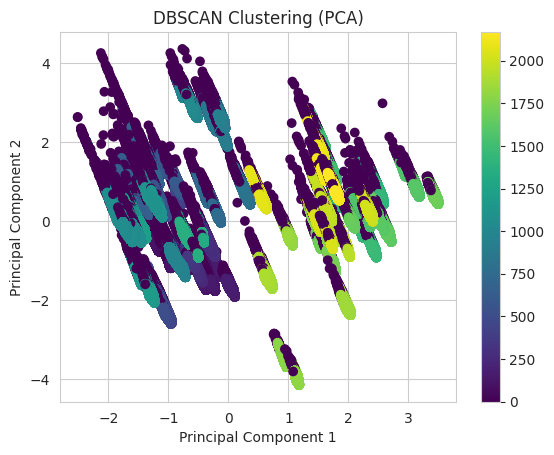

In [200]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Instantiate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
dbscan.fit(scaled_data)
cluster_labels = dbscan.labels_


# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Perform clustering on the reduced dataset (you can use DBSCAN as before)
cluster_labels = dbscan.labels_

# Visualize the clustered data points in the reduced space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering (PCA)')
plt.colorbar()
plt.show()




In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


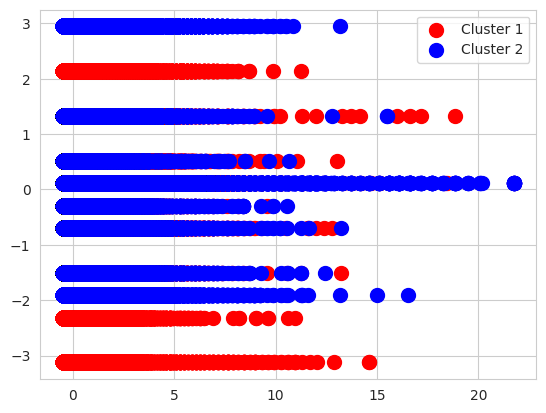

In [57]:
plt.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.legend()
plt.show()

In [58]:
y_kmeans

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [59]:
final_df['cluster']=y_kmeans

In [60]:
final_df

,activity,days,gender,afftype,melanch,inpatient,age_encoded,year,month,day,hour,minute,day_of_week,cluster
0,60,8,2,0.0,2.0,0.0,2,2003,3,18,15,0,1,1
1,0,8,2,0.0,2.0,0.0,2,2003,3,18,15,1,1,1
2,264,8,2,0.0,2.0,0.0,2,2003,3,18,15,2,1,1
3,662,8,2,0.0,2.0,0.0,2,2003,3,18,15,3,1,1
4,293,8,2,0.0,2.0,0.0,2,2003,3,18,15,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,0,13,2,1.0,2.0,2.0,6,2004,6,10,15,3,3,0
1571702,0,13,2,1.0,2.0,2.0,6,2004,6,10,15,4,3,0
1571703,449,13,2,1.0,2.0,2.0,6,2004,6,10,15,5,3,0
1571704,0,13,2,1.0,2.0,2.0,6,2004,6,10,15,6,3,0


In [61]:
print("Inertia:", kmeans.inertia_)


Inertia: 17344187.82537748


In [62]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 279828.9869915161


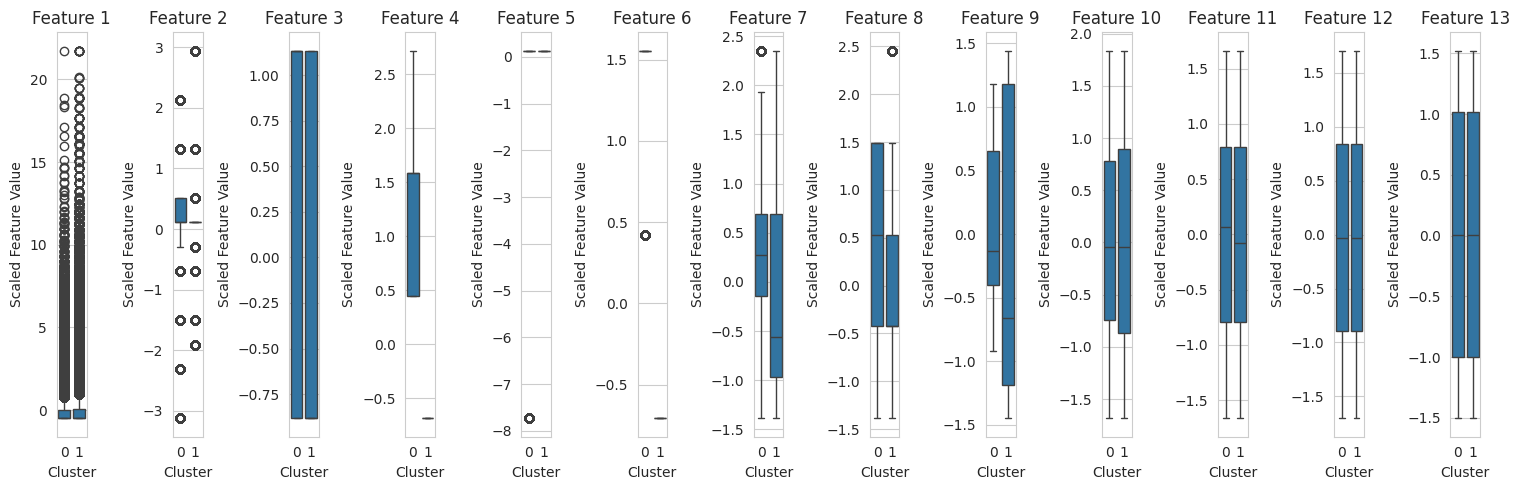

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of features and set up the subplots
num_features = scaled_data.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))  # Adjust figsize as needed

# Create boxplots for each feature
for i, ax in enumerate(axes):
    sns.boxplot(x=y_kmeans, y=scaled_data[:, i], ax=ax)
    ax.set_title(f'Feature {i+1}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Scaled Feature Value')

plt.tight_layout()
plt.show()


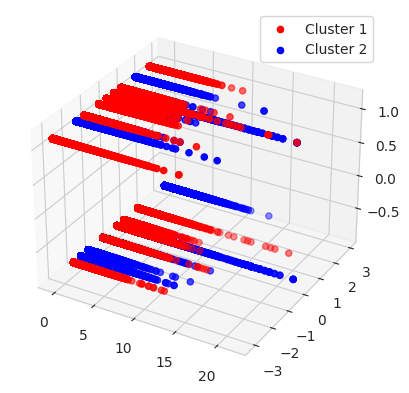

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], scaled_data[y_kmeans == 0, 2], c='red', label='Cluster 1')
ax.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], scaled_data[y_kmeans == 1, 2], c='blue', label='Cluster 2')
plt.legend()
plt.show()
